
<a id='likelihood-ratio-process'></a>

# Likelihood Ratio Processes

## Contents

- [Likelihood Ratio Processes](#Likelihood-Ratio-Processes)  
  - [Overview](#Overview)  
  - [Likelihood Ratio Process](#Likelihood-Ratio-Process)  
  - [Nature Permanently Draws from Density g](#Nature-Permanently-Draws-from-Density-g)  
  - [Nature Permanently Draws from Density f](#Nature-Permanently-Draws-from-Density-f)  
  - [Likelihood Ratio Test](#Likelihood-Ratio-Test)  
  - [Sequels](#Sequels)  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import vectorize, njit
from math import gamma
%matplotlib inline

## Overview

This lecture describes likelihood ratio processes and some of their uses.

We’ll use a setting described in [this lecture](https://python.quantecon.org/exchangeable.html).

Among the things that we’ll learn about are

- A peculiar property of likelihood ratio processes  
- How a likelihood ratio process is the key ingredient in frequentist hypothesis testing  
- How a **receiver operator characteristic curve** summarizes information about a false alarm probability and power in frequentist hypothesis testing  
- How during World War II the United States Navy devised a decision rule that Captain Garret L. Schyler challenged and asked Milton Friedman to justify to him, a topic to be studied in  [this lecture](https://python.quantecon.org/wald_friedman.html)  

## Likelihood Ratio Process

A nonnegative random variable $ W $ has one of two probability density functions, either
$ f $ or $ g $.

Before the beginning of time, nature once and for all decides whether she will draw a sequence of IID draws from either
$ f $ or $ g $.

We will sometimes let $ q $ be the density that nature chose once and for all, so
that $ q $ is either $ f $ or $ g $, permanently.

Nature knows which density it permanently draws from, but we the observers do not.

We do know both $ f $ and $ g $ but we don’t know which density nature
chose.

But we want to know.

To do that, we use observations.

We observe a sequence $ \{w_t\}_{t=1}^T $ of $ T $ IID draws
from either $ f $ or $ g $.

We want to use these observations to infer whether nature chose $ f $ or
$ g $.

A **likelihood ratio process** is a useful tool for this task.

To begin, we define key component of a likelihood ratio process, namely, the time $ t $ likelihood ratio  as the random variable

$$
\ell (w_t)=\frac{f\left(w_t\right)}{g\left(w_t\right)},\quad t\geq1.
$$

We assume that $ f $ and $ g $ both put positive probabilities on the
same intervals of possible realizations of the random variable $ W $.

That means that under the $ g $ density,  $ \ell (w_t)=
\frac{f\left(w_{t}\right)}{g\left(w_{t}\right)} $
is evidently a nonnegative  random variable with mean $ 1 $.

A **likelihood ratio process** for sequence
$ \left\{ w_{t}\right\} _{t=1}^{\infty} $ is defined as

$$
L\left(w^{t}\right)=\prod_{i=1}^{t} \ell (w_i),
$$

where $ w^t=\{ w_1,\dots,w_t\} $ is a history of
observations up to and including time $ t $.

Sometimes for shorthand we’ll write $ L_t =  L(w^t) $.

Notice that the likelihood process satisfies the *recursion* or
*multiplicative decomposition*

$$
L(w^t) = \ell (w_t) L (w^{t-1}) .
$$

The likelihood ratio and its logarithm are key tools for making
inferences using a classic frequentist approach due to Neyman and
Pearson [[NP33]](https://python.quantecon.org/zreferences.html#neyman-pearson).

To help us appreciate how things work, the following Python code evaluates $ f $ and $ g $ as two different
beta distributions, then computes and simulates an associated likelihood
ratio process by generating a sequence $ w^t $ from *some*
probability distribution, for example, a sequence of  IID draws from $ g $.

In [2]:
# Parameters in the two beta distributions.
F_a, F_b = 1, 1
G_a, G_b = 3, 1.2

@vectorize
def p(x, a, b):
    r = gamma(a + b) / (gamma(a) * gamma(b))
    return r * x** (a-1) * (1 - x) ** (b-1)

# The two density functions.
f = njit(lambda x: p(x, F_a, F_b))
g = njit(lambda x: p(x, G_a, G_b))

In [3]:
@njit
def simulate(a, b, T=50, N=500):
    '''
    Generate N sets of T observations of the likelihood ratio,
    return as N x T matrix.

    '''

    l_arr = np.empty((N, T))

    for i in range(N):

        for j in range(T):
            w = np.random.beta(a, b)
            l_arr[i, j] = f(w) / g(w)

    return l_arr

## Nature Permanently Draws from Density g

We first simulate the likelihood ratio process when nature permanently
draws from $ g $.

In [4]:
l_arr_g = simulate(G_a, G_b)
l_seq_g = np.cumprod(l_arr_g, axis=1)

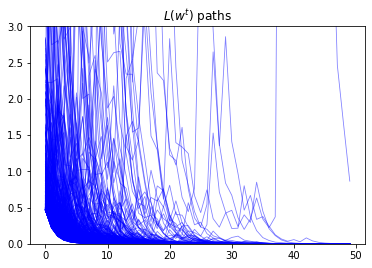

In [5]:
N, T = l_arr_g.shape

for i in range(N):

    plt.plot(range(T), l_seq_g[i, :], color='b', lw=0.8, alpha=0.5)

plt.ylim([0, 3])
plt.title("$L(w^{t})$ paths"); 

Evidently, as sample length $ T $ grows, most probability mass
shifts toward zero(**Issue:.**)

To see it this more clearly clearly, we plot over time the fraction of
paths $ L\left(w^{t}\right) $ that fall in the interval
$ \left[0, 0.01\right] $.

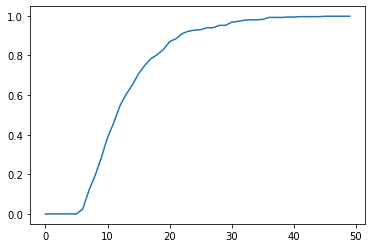

In [6]:
plt.plot(range(T), np.sum(l_seq_g <= 0.01, axis=0) / N)

Despite the evident convergence of most probability mass to a
very small interval near $ 0 $,  the unconditional mean of
$ L\left(w^t\right) $ under probability density $ g $ is
identically $ 1 $ for all $ t $.

To verify this assertion, first notice that as mentioned earlier the unconditional mean
$ E_{0}\left[\ell \left(w_{t}\right)\bigm|q=g\right] $ is $ 1 $ for
all $ t $:

$$
\begin{aligned}
E_{0}\left[\ell \left(w_{t}\right)\bigm|q=g\right]  &=\int\frac{f\left(w_{t}\right)}{g\left(w_{t}\right)}g\left(w_{t}\right)dw_{t} \\
    &=\int f\left(w_{t}\right)dw_{t} \\
    &=1,
\end{aligned}
$$

which immediately implies

$$
\begin{aligned}
E_{0}\left[L\left(w^{1}\right)\bigm|q=g\right]  &=E_{0}\left[\ell \left(w_{1}\right)\bigm|q=g\right]\\
    &=1.\\
\end{aligned}
$$

Because $ L(w^t) = \ell(w_t) L(w^{t-1}) $ and
$ \{w_t\}_{t=1}^t $ is an IID sequence, we have

$$
\begin{aligned}
E_{0}\left[L\left(w^{t}\right)\bigm|q=g\right]  &=E_{0}\left[L\left(w^{t-1}\right)\ell \left(w_{t}\right)\bigm|q=g\right] \\
    &=E_{0}\left[L\left(w^{t-1}\right)E\left[\ell \left(w_{t}\right)\bigm|q=g,w^{t-1}\right]\bigm|q=g\right] \\
    &=E_{0}\left[L\left(w^{t-1}\right)E\left[\ell \left(w_{t}\right)\bigm|q=g\right]\bigm|q=g\right] \\
    &=E_{0}\left[L\left(w^{t-1}\right)\bigm|q=g\right] \\
\end{aligned}
$$

for any $ t \geq 1 $.

Mathematical induction implies
$ E_{0}\left[L\left(w^{t}\right)\bigm|q=g\right]=1 $ for all
$ t \geq 1 $.

### Peculiar Property of Likelihood Ratio Process

How can $ E_{0}\left[L\left(w^{t}\right)\bigm|q=g\right]=1 $ possibly be true when most  probability mass of the likelihood
ratio process is piling up near $ 0 $ as
$ t \rightarrow + \infty $?

The answer has to be that as $ t \rightarrow + \infty $, the
distribution of $ L_t $ becomes more and more fat-tailed:
enough  mass shifts to larger and larger values of $ L_t $ to make
the mean of $ L_t $ continue to be one despite most of the probability mass piling up
near $ 0 $.

To illustrate this peculiar property, we simulate many paths and
calculate the unconditional mean of $ L\left(w^t\right) $ by
averaging across these many paths at each $ t $.

In [7]:
l_arr_g = simulate(G_a, G_b, N=50000)
l_seq_g = np.cumprod(l_arr_g, axis=1)

It would be useful to use simulations to verify that  unconditional means
$ E_{0}\left[L\left(w^{t}\right)\right] $ equal unity by averaging across sample
paths.

But it would be too challenging for us to that  here simply by applying a standard Monte Carlo simulation approach.

The reason is that the distribution of $ L\left(w^{t}\right) $ is extremely skewed for large values of  $ t $.

Because the probabilty (**Issue:probability**) density in the right tail is close to $ 0 $,  it just takes too much computer time to sample enough points from the right tail.

Instead, the following code just illustrates that the unconditional means of $ l(w_t) $ are $ 1 $.

While   sample averages  hover around their population means of $ 1 $, there is evidently  quite a bit
of variability.

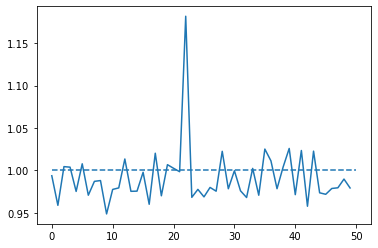

In [8]:
N, T = l_arr_g.shape
plt.plot(range(T), np.mean(l_arr_g, axis=0))
plt.hlines(1, 0, T, linestyle='--')

## Nature Permanently Draws from Density f

Now suppose that before time $ 0 $ nature permanently decided to draw repeatedly from density $ f $.

While the mean of the likelihood ratio $ \ell \left(w_{t}\right) $ under density
$ g $ is $ 1 $, its mean under the density $ f $ exceeds one.

To see this, we compute

$$
\begin{aligned}
E_{0}\left[\ell \left(w_{t}\right)\bigm|q=f\right]  &=\int\frac{f\left(w_{t}\right)}{g\left(w_{t}\right)}f\left(w_{t}\right)dw_{t} \\
    &=\int\frac{f\left(w_{t}\right)}{g\left(w_{t}\right)}\frac{f\left(w_{t}\right)}{g\left(w_{t}\right)}g\left(w_{t}\right)dw_{t} \\
    &=\int \ell \left(w_{t}\right)^{2}g\left(w_{t}\right)dw_{t} \\
    &=E_{0}\left[\ell \left(w_{t}\right)^{2}\mid q=g\right] \\
    &=E_{0}\left[\ell \left(w_{t}\right)\mid q=g\right]^{2}+Var\left(\ell \left(w_{t}\right)\mid q=g\right) \\
    &>E_{0}\left[\ell \left(w_{t}\right)\mid q=g\right]^{2} = 1 \\
       \end{aligned}
$$

This in turn implies that the unconditional mean of the likelihood ratio process $ L(w^t) $
diverges toward $ + \infty $.

Simulations below confirm this conclusion.

Please note the scale of the $ y $ axis.

In [9]:
l_arr_f = simulate(F_a, F_b, N=50000)
l_seq_f = np.cumprod(l_arr_f, axis=1)

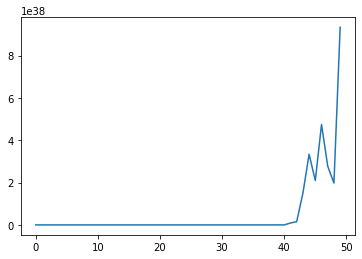

In [10]:
N, T = l_arr_f.shape
plt.plot(range(T), np.mean(l_seq_f, axis=0))

We also plot the probability that $ L\left(w^t\right) $ falls into
the interval $ [10000, \infty) $ as a function of time and watch how
fast probability mass diverges  to $ +\infty $.

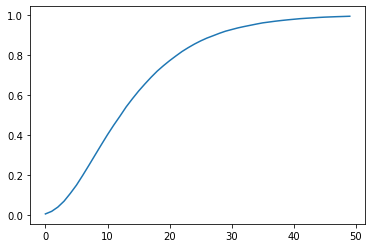

In [11]:
plt.plot(range(T), np.sum(l_seq_f > 10000, axis=0) / N)

## Likelihood Ratio Test

We now describe how to employ the machinery
of Neyman and Pearson [[NP33]](https://python.quantecon.org/zreferences.html#neyman-pearson) to test the hypothesis that  history $ w^t $ is generated by repeated
IID draws from density $ g $.

Denote $ q $ as the data generating process, so that
$ q=f \text{ or } g $.

Upon observing a sample $ \{W_i\}_{i=1}^t $, we want to decide
which one is the data generating process by performing  a (frequentist)
hypothesis test.

We specify

- Null hypothesis $ H_0 $: $ q=f $,  
- Alternative hypothesis $ H_1 $: $ q=g $.  


Neyman and Pearson proved that the best way to test this hypothesis is to use a **likelihood ratio test** that takes the
form:

- reject $ H_0 $ if $ L(W^t) < c $,  
- accept $ H_0 $ otherwise.  


where $ c $ is a given  discrimination threshold, to be chosen in a way we’ll soon describe.

This test is *best* in the sense that it is a **uniformly most powerful** test.

To understand what this means, we have to define probabilities of two important events that
allow us to characterize a test associated with given
threshold $ c $.

The two probabilities are:

- Probability of detection (= power = 1 minus probability
  of Type II error):  
  $$
  1-\beta \equiv \Pr\left\{ L\left(w^{t}\right)<c\mid q=g\right\}
  $$
- Probability of false alarm (= significance level = probability of
  Type I error):  
  $$
  \alpha \equiv  \Pr\left\{ L\left(w^{t}\right)<c\mid q=f\right\}
  $$


The [Neyman-Pearson
Lemma](https://en.wikipedia.org/wiki/Neyman%E2%80%93Pearson_lemma) (**nissue:link issue**)
states that among all possible tests, a likelihood ratio test
maximizes the probability of detection for a given probability of false
alarm.

Another way to say the same thing is that  among all possible tests, a likelihood ratio test
maximizes **power** for a given **significance level**.

To have made a confident inference, we want a small probability of
false alarm and a large probability of detection.

With sample size $ t $ fixed, we can change our two probabilities by
adjusting $ c $.

A troublesome “that’s life” fact is that these two probabilities  move in the same direction as we vary the critical value
$ c $.

Without specifying quantitative losses from making Type I and Type II errors, there is little that we can say
about how we *should*  trade off probabilities of the two types of mistakes.

We do know that increasing sample size $ t $ improves
statistical inference.

Below we plot some informative figures that illustrate this.

We also present a classical frequentist method for choosing a sample
size $ t $.

Let’s start with a case in which we fix the threshold $ c $ at
$ 1 $.

In [12]:
c = 1

Below we plot empirical distributions of logarithms of the cumulative
likelihood ratios simulated above, which are generated by either
$ f $ or $ g $.

Taking logarithms has no effect on calculating the probabilities because
the log  is a monotonic transformation.

As $ t $ increases, the probabilities of making Type I and Type II
errors both decrease, which is good.

This is because most of the probability mass of log$ (L(w^t)) $
moves toward $ -\infty $ when $ g $ is the data generating
process, ; while log$ (L(w^t)) $ goes to
$ \infty $ when data are generated by $ f $.

This diverse behavior is what makes it possible to distinguish
$ q=f $ from $ q=g $.

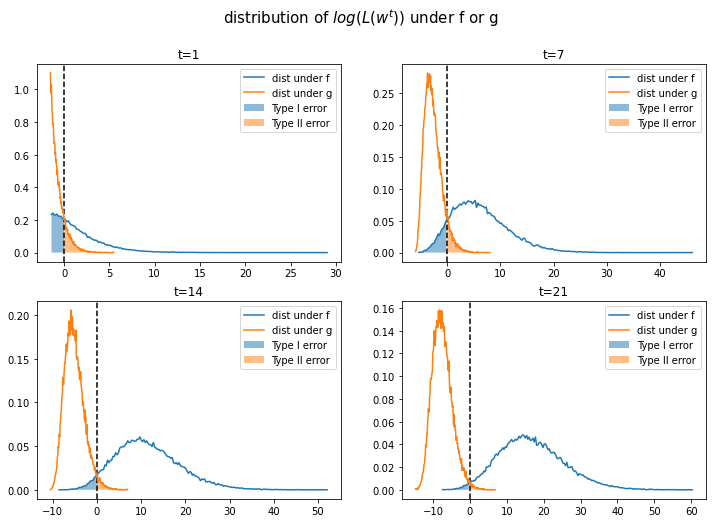

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('distribution of $log(L(w^t))$ under f or g', fontsize=15)

for i, t in enumerate([1, 7, 14, 21]):
    nr = i // 2
    nc = i % 2

    axs[nr, nc].axvline(np.log(c), color="k", ls="--")

    hist_f, x_f = np.histogram(np.log(l_seq_f[:, t]), 200, density=True)
    hist_g, x_g = np.histogram(np.log(l_seq_g[:, t]), 200, density=True)

    axs[nr, nc].plot(x_f[1:], hist_f, label="dist under f")
    axs[nr, nc].plot(x_g[1:], hist_g, label="dist under g")

    for i, (x, hist, label) in enumerate(zip([x_f, x_g], [hist_f, hist_g], ["Type I error", "Type II error"])):
        ind = x[1:] <= np.log(c) if i == 0 else x[1:] > np.log(c)
        axs[nr, nc].fill_between(x[1:][ind], hist[ind], alpha=0.5, label=label)

    axs[nr, nc].legend()
    axs[nr, nc].set_title(f"t={t}")

plt.show()

The graph below shows more clearly that, when we hold the threshold
$ c $ fixed, the probability of detection monotonically increases with increases in
$ t $ and that the probability of a false alarm monotonically decreases.

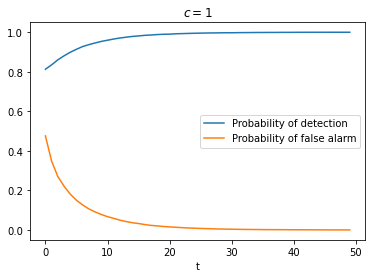

In [14]:
PD = np.empty(T)
PFA = np.empty(T)

for t in range(T):
    PD[t] = np.sum(l_seq_g[:, t] < c) / N
    PFA[t] = np.sum(l_seq_f[:, t] < c) / N

plt.plot(range(T), PD, label="Probability of detection")
plt.plot(range(T), PFA, label="Probability of false alarm")
plt.xlabel("t")
plt.title("$c=1$")
plt.legend()
plt.show()

For a given sample size $ t $,  the threshold $ c $ uniquely pins down  probabilities
of both types of error.

If for a fixed $ t $ we now free up and move $ c $, we will sweep out the probability
of detection as a function of the probability of false alarm.

This produces what is called a [receiver operating characteristic
curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).

Below, we plot receiver operating characteristic curves for different
sample sizes $ t $.

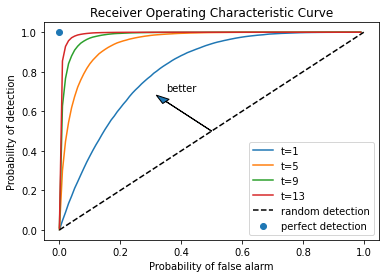

In [15]:
PFA = np.arange(0, 100, 1)

for t in range(1, 15, 4):
    percentile = np.percentile(l_seq_f[:, t], PFA)
    PD = [np.sum(l_seq_g[:, t] < p) / N for p in percentile]

    plt.plot(PFA / 100, PD, label=f"t={t}")

plt.scatter(0, 1, label="perfect detection")
plt.plot([0, 1], [0, 1], color='k', ls='--', label="random detection")

plt.arrow(0.5, 0.5, -0.15, 0.15, head_width=0.03)
plt.text(0.35, 0.7, "better")
plt.xlabel("Probability of false alarm")
plt.ylabel("Probability of detection")
plt.legend()
plt.title("Receiver Operating Characteristic Curve")
plt.show()

Notice that as $ t $ increases, we are assured a larger probability
of detection and a smaller probability of false alarm associated with
a given discrimination threshold $ c $.

As $ t \rightarrow + \infty $, we approach the the perfect (**Issue: the perfect**) detection
curve that is indicated by a right angle hinging on the green dot.

For a given sample size $ t $, a value discrimination threshold $ c $ determines a point on the receiver operating
characteristic curve.

It is up to the test designer to trade off probabilities of
making the two types of errors.

But we know how to choose the smallest sample size to achieve given targets for
the probabilities.

Typically, frequentists aim for a high probability of detection that
respects an upper bound on the probability of false alarm.

Below we show an example in which we fix the probability of false alarm at
$ 0.05 $.

The required sample size for making a decision is then determined by a
target probability of detection, for example, $ 0.9 $, as depicted in the following graph.

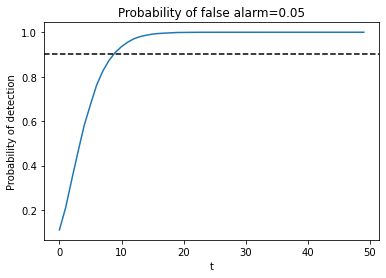

In [16]:
PFA = 0.05
PD = np.empty(T)

for t in range(T):

    c = np.percentile(l_seq_f[:, t], PFA * 100)
    PD[t] = np.sum(l_seq_g[:, t] < c) / N

plt.plot(range(T), PD)
plt.axhline(0.9, color="k", ls="--")

plt.xlabel("t")
plt.ylabel("Probability of detection")
plt.title(f"Probability of false alarm={PFA}")
plt.show()

The United States Navy evidently used a procedure like this to select a sample size $ t $ for doing quality
control tests during World War II.

A Navy Captain who had been ordered to perform tests of this kind had second thoughts about it that he
presented to Milton Friedman, as we describe in  [this lecture](https://python.quantecon.org/wald_friedman.html).

## Sequels

Likelihood processes play an important role in Bayesian learning, as described in [this lecture](https://python.quantecon.org/likelihood_bayes.html)
and as applied in [this lecture](https://python.quantecon.org/odu.html).

Likelihood ratio processes appear again in [this lecture](https://python-advanced.quantecon.org/additive_functionals.html), which contains another illustration
of the **peculiar property** of likelihood ratio processes described above.